This used a copy of the code in the notebook provided in Fragmenstein.
To see the results see the last cell.
To copy the code see Fragmenstein github.

In [ ]:
import pyrosetta
import pyrosetta_help as ph
from fragmenstein import Victor, Laboratory, Igor

Igor.init_pyrosetta()

In [ ]:
# this has no density map
# not needed but nice to use
from github import Github
repo = Github().get_user('samplchallenges').get_repo('SAMPL7')
pdb_block:str = repo.get_contents('protein_ligand/PHIPA_C2_Apo.pdb').decoded_content.decode('utf8')
pose = pyrosetta.Pose()
pyrosetta.rosetta.core.import_pose.pose_from_pdbstring(pose, pdb_block)

In [ ]:
# ground-state model
pose = pyrosetta.toolbox.pose_from_rcsb('5RJI')

# oh. it has no density...
# ph.download_map('5RJI')

In [ ]:
scorefxn = pyrosetta.get_fa_scorefxn()
cycles = 5

relax = pyrosetta.rosetta.protocols.relax.FastRelax(scorefxn, cycles)
movemap = pyrosetta.MoveMap()
movemap.set_bb(False)
movemap.set_chi(True)
relax = pyrosetta.rosetta.protocols.relax.FastRelax(scorefxn, cycles)
relax.set_movemap(movemap)
relax.apply(pose)

In [ ]:
# I yet have to add a route to provide a pose directly
pdbblock:str = ph.get_pdbstr(pose)

In [1]:
import pandas as pd

metadata = pd.read_pickle('metadata_pandas.p')

for i, row in metadata.iterrows():
    row.mol.SetProp('_Name', row.paper_name)

hits = metadata.mol.values

> PLACEHOLDER FOR THE LABORATORY CODE FROM FRAGMENSTEIN

Below is the summary of the results.

Top 10 hits search, under standard settings:
 * `percent_hybrid` left at 30% (i.e. in 10 atom merger, the 7 or less atoms come from the primary hit,while 3 or more atoms come from the secondary hit)
 * standard RMSD < 1. Aangstroem
 * 'Quick reanimation' (stops trying to minimise hard cases as they would be discarded anyway)

In [ ]:
from IPython.display import FileLink

combinations.to_pickle('combinations_pandas.p')
FileLink('combinations_pandas.p')
placements.to_pickle('placements_pandas.p')
FileLink('placements_pandas.p')
best_combinations.to_pickle('placements_pandas.p')
FileLink('best_combinations_pandas.p')
best_placements.to_pickle('best_placements_pandas.p')
FileLink('best_placements_pandas.p')

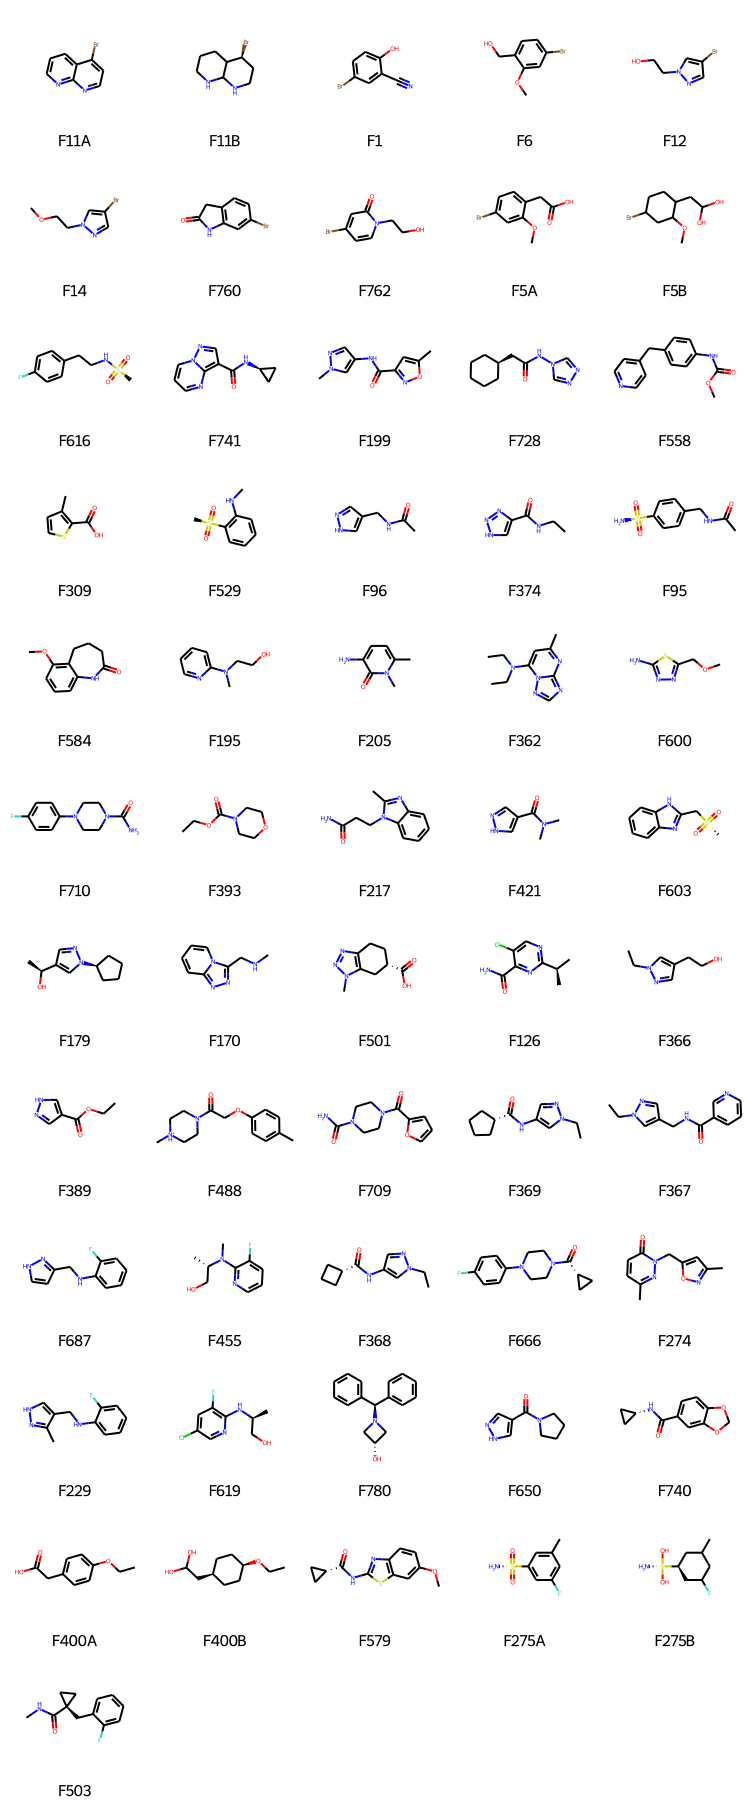

,name,smiles,error,mode,∆∆G,∆G_bound,∆G_unbound,comRMSD,N_constrained_atoms,N_unconstrained_atoms,...,hit_binaries,LE,unminimized_mol,minimized_mol,mpro_mols,outcome,unreacted_smiles,warhead_type,hit_mols,percent_hybrid
0,F366-F170,CCCn1ncc2cc(O)ccc21,,none_permissive,-8.941057,-8.959472,-0.018415,0.511237,13,0,...,"[b""\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...",-0.687774,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f29a0>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f52062c0>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f52067...,acceptable,CCCn1ncc2cc(O)ccc21,noncovalent,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f52067...,38.5
1,F195-F11A,OCCN1C=CC=C2C(Br)=CC=N[C@@H]21,,none_permissive,-9.080358,-8.926018,0.154340,0.382641,14,0,...,"[b""\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...",-0.648597,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2f40>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f5206450>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f52067...,acceptable,OCCN1C=CC=C2C(Br)=CC=N[C@@H]21,noncovalent,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f52067...,35.7
2,F205-F687,C[C@]12C[C@H]3C=CC=CN3C(=O)[C@@H]1C=CNN2,,none_permissive,-10.339503,-10.282420,0.057083,0.443401,16,0,...,"[b""\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...",-0.646219,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2f90>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f5206400>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f52068...,acceptable,C[C@]12C[C@H]3C=CC=CN3C(=O)[C@@H]1C=CNN2,noncovalent,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f52068...,43.8
3,F195-F650,OCCC1CCCN1c1ccccn1,,none_permissive,-8.752597,-8.660592,0.092005,0.485187,14,0,...,"[b""\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...",-0.625185,<rdkit.Chem.rdchem.Mol object at 0x7fa3f5206040>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f52064f0>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f52068...,acceptable,OCCC1CCCN1c1ccccn1,noncovalent,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f52068...,35.7
4,F584-F366,COc1cccc2c1CCCc1cc(CCO)cn1-2,,none_permissive,-11.748228,-11.870902,-0.122673,0.349301,19,0,...,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,-0.618328,<rdkit.Chem.rdchem.Mol object at 0x7fa3f5206090>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f5206540>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f52069...,acceptable,COc1cccc2c1CCCc1cc(CCO)cn1-2,noncovalent,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f52069...,31.6
5,F96-F275A,NS(=O)(=O)c1ccc(O)c(Cc2cn[nH]c2)c1,,none_permissive,-10.459775,-10.175119,0.284656,0.279752,17,0,...,"[b""\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...",-0.615281,<rdkit.Chem.rdchem.Mol object at 0x7fa3f52060e0>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f52065e0>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f52069...,acceptable,NS(=O)(=O)c1ccc(O)c(Cc2cn[nH]c2)c1,noncovalent,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f52069...,41.2
6,F14-F170,COCCn1ncc2ccccc21,,none_permissive,-7.836681,-7.768659,0.068023,0.371836,13,0,...,"[b""\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...",-0.602822,<rdkit.Chem.rdchem.Mol object at 0x7fa3f5206130>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f52064a0>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f5206a...,acceptable,COCCn1ncc2ccccc21,noncovalent,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f5206a...,30.8
7,F400B-F179,OC[C@H](C(O)O)C1CC[SH]2(O)(CCCC2)CC1,,none_permissive,-10.202897,-9.678900,0.523997,0.812901,17,0,...,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,-0.600170,<rdkit.Chem.rdchem.Mol object at 0x7fa3f5206180>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f5206590>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f5206b...,acceptable,OC[C@H](C(O)O)C1CC[SH]2(O)(CCCC2)CC1,noncovalent,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f5206b...,35.3
8,F195-F5B,C[C@@H](CO)[C@H]1C[C@@H](C(O)O)Cc2cccnc21,,none_permissive,-10.180402,-9.743885,0.436517,0.545273,17,0,...,"[b""\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...",-0.598847,<rdkit.Chem.rdchem.Mol object at 0x7fa3f5206270>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f5206680>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f5206b...,acceptable,C[C@@H](CO)[C@H]1C[C@@H](C(O)O)Cc2cccnc21,noncovalent,[<r

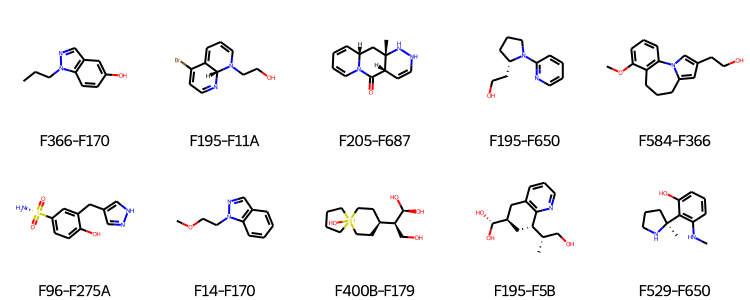

,name,smiles,error,mode,∆∆G,∆G_bound,∆G_unbound,comRMSD,N_constrained_atoms,N_unconstrained_atoms,...,enamine_minimized_mol,mpro_mols,outcome,const_ratio,merger_∆∆G,merger_minimized_mol,merger_unminimized_mol,merger_inspiration_names,hit_mols,merger_inspiration_mols
0,Z1741815525,CC1=CC=CC2=C1CCCN2CCN,,expansion,-8.830819,-8.742428,0.088391,0.545227,14,0,...,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51faf40>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f23...,acceptable,1.000000,-9.080358,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2680>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2810>,"[F195, F11A]",[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f23...,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f23...
1,PV-004837860770,C=CCN1CCC2=CC(C)=CC=C21,,expansion,-7.520921,-7.454443,0.066478,0.457858,13,0,...,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51faf90>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f23...,acceptable,1.000000,-8.941057,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f26d0>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f28b0>,"[F366, F170]",[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f23...,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f23...
2,Z4151362389,CC(C)(C)C1=CN(CC2=CN=CO2)C(=O)C=C1,,expansion,-9.761618,-9.499644,0.261974,0.369233,17,0,...,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2040>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f22...,acceptable,1.000000,-10.459775,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f27c0>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2900>,"[F96, F275A]",[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f22...,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f22...
3,PV-006133632842,C#CCCN1CCC2=CC=CC=C21,,expansion,-7.399064,-7.271153,0.127911,0.275584,13,0,...,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2090>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f24...,acceptable,1.000000,-7.836681,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2770>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2950>,"[F14, F170]",[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f24...,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f24...
4,PV-005319971059,C=CCN1CCCC2=C1C=CC=C2Br,,expansion,-7.822814,-7.587992,0.234822,0.609099,14,0,...,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f20e0>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f24...,acceptable,1.000000,-9.080358,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2680>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2810>,"[F195, F11A]",[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f24...,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f24...
5,Z2832701125,CC(C)(C)C1=CN(CC2=CC=CS2)C(=O)C=C1,,expansion,-10.443554,-10.363632,0.079922,0.934127,13,6,...,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2180>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f23...,acceptable,0.684211,-10.459775,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f27c0>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2900>,"[F96, F275A]",[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f23...,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f23...
6,PV-002119214916,CC1=CC=CC2=C1CCCN2CCF,,expansion,-7.621197,-7.492816,0.128381,0.520864,14,0,...,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f21d0>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f24...,acceptable,1.000000,-9.080358,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2680>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2810>,"[F195, F11A]",[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f24...,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f24...
7,Z2613920890,CC(C)(C)C1=CN(CC2=CN=CS2)C(=O)C=C1,,expansion,-9.192424,-8.939403,0.253021,0.417803,17,0,...,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2130>,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f24...,acceptable,1.000000,-10.459775,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f27c0>,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2900>,"[F96, F275A]",[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f24...,[<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f24...
8,PV-003850534502,CC(C)(C)C1=CC=C(O)C(C=C2CCOC2)=C1,,expansion,-9.138627,-9.258565,-0.119938,0.792282,17,0,...,<rdkit.Chem.rdchem.Mol object at 0x7fa3f51f2220>,[<rdkit.Chem.rdchem.Mo

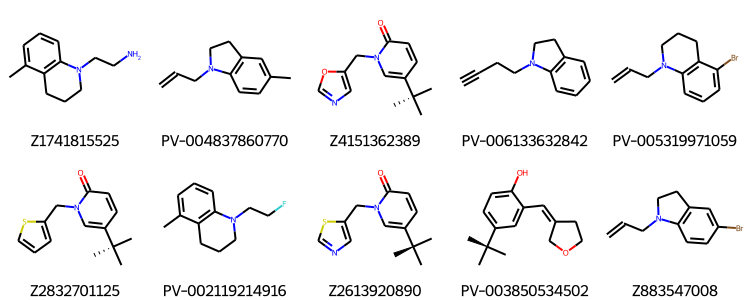

In [12]:
import pandas as pd

best_placements = pd.read_pickle('best_placements_pandas.p')
best_placements.apply(lambda row: row.enamine_minimized_mol.SetProp('_Name', row['name']), axis=1)
best_combinations = pd.read_pickle('best_combinations_pandas.p')
best_combinations.apply(lambda row: row.unminimized_mol.SetProp('_Name', row['name']), axis=1)
best_combinations.apply(lambda row: row.minimized_mol.SetProp('_Name', row['name']), axis=1)

# ----------- Copied from Fragmenstein ------------------------------------------------------------------
from typing import Callable, Sequence, Dict, List, Tuple, Optional, Union
from IPython.display import display, HTML
from rdkit import Chem, IPythonConsole
from rdkit.Chem import AllChem, Draw
from IPython.display import clear_output, HTML, display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import py3Dmol

headerify: Callable[[str], HTML] = lambda header: HTML(f'<h3>{header}</h3>')
def display_mols(mols: Sequence[Chem.Mol],
                 molsPerRow=5,
                 subImgSize=(150,150),
                 useSVG=True):
    """
    Rudimentary wrapper for calling ``display(Draw.MolsToGridImage``
    """
    flattos = [AllChem.RemoveHs(mol) for mol in mols if isinstance(mol, Chem.Mol)]
    for mol in flattos:
        AllChem.Compute2DCoords(mol)
    display(Draw.MolsToGridImage(flattos,
                         legends=[mol.GetProp('_Name') if mol.HasProp('_Name') else '-' for mol in mols],
                         subImgSize=subImgSize,
                         maxMols=100,
                         useSVG=useSVG,
                         molsPerRow=molsPerRow))

def stylize(representation: str, color: str) -> Dict[str, Dict[str, Dict[str, str]]]:
    if 'carbon' in color.lower():
        return dict(style={representation: {'colorscheme': color}})
    else:
        return dict(style={representation: {'color': color}})

def make_3Dview(template_pdbblock, colormols: Dict[str, List[Chem.Mol]]) -> py3Dmol.view:
    """
    colormols is a diction of color/colorscheme to list of mols.
    """
    view = py3Dmol.view(js="https://3dmol.org/build/3Dmol.js")
    view.addModel(template_pdbblock, "pdb", stylize('cartoon', 'gainsboro'))
    view.setStyle(dict(hetflag=True), stylize('stick', 'whiteCarbon'))
    for color, mols in colormols.items():
        for mol in mols:
            view.addModel(Chem.MolToMolBlock(mol), "mol", stylize('stick', color))
    view.zoomTo(dict(hetflag=True))
    return view

def show3D_combined(index_to_show):
    row = best_combinations.iloc[index_to_show]
    print(f'Green: hits {[h.GetProp("_Name") for h in row["hit_mols"]]}')
    print('Cyan: merger')
    display(make_3Dview(pdbblock, {'greenCarbon': row.hit_mols,
                           'cyanCarbon': [row.minimized_mol]}))

def show3D_placed(index_to_show):
        row = best_placements.iloc[index_to_show]
        print(f'Green: hits {row["merger_inspiration_names"]}')
        print('Cyan: merger')
        print(f'Magenta: Enamine Real purchasable {row["name"]}')
        display(make_3Dview(pdbblock, {'greenCarbon': row.merger_inspiration_mols,
                               'cyanCarbon': [row.merger_minimized_mol],
                               'magentaCarbon': [row.enamine_minimized_mol]}))

# -------------------Custom ----------------------------------------------------------------------------------
headerify('Provided hits')
display_mols(hits)
display(headerify('Step 1. Combine'))
display(best_combinations.drop(['unmin_binary', 'min_binary'], axis=1))
display_mols(best_combinations.minimized_mol)

display(headerify('Step 2. Placement of purchasable similars'))
display(headerify('Top 10 Placements'))
noisy_fields = []
display( best_placements.drop(noisy_fields, axis=1) )
display_mols(best_placements.enamine_minimized_mol)

# The selection + 3D view does not store well for the notebook in GitHub
#print('In the sorted combinations table (`best_combinations`) which index do you want to see:')
#scale = widgets.IntSlider(min=0,max=len(best_combinations)-1, step=1, value=0)
#interact(show3D_combined, index_to_show=scale)
#print('In the sorted combinations table (`best_combinations`) which index do you want to see:')
#scale = widgets.IntSlider(min=0,max=len(best_placements)-1, step=1, value=0)
#interact(show3D_placed, index_to_show=scale)

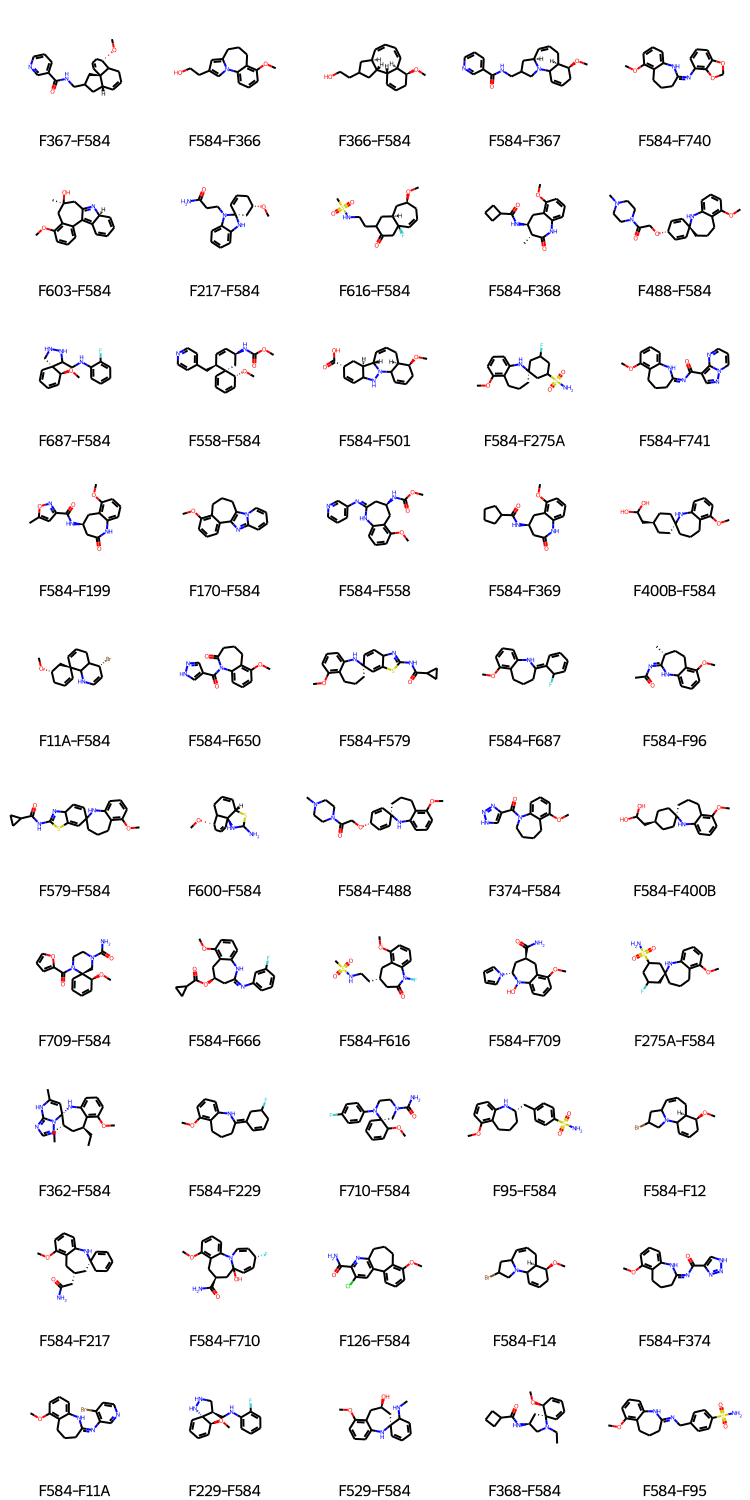

In [18]:
# I am told F584 is the most promising based on inspection of the crystal structure
# lets sort not by ligand efficiency, but ∆∆G, i.e. chonkiness wins.

combinations = pd.read_pickle('combinations_pandas.p')
combinations.apply(lambda row: row.unminimized_mol.SetProp('_Name', row['name']), axis=1)

combinations['has_F584'] = combinations.name.str.contains('F584')

F584_combinations = combinations.loc[(combinations.outcome == 'acceptable') &\
                                     (combinations.percent_hybrid > 20) &\
                                     (combinations.has_F584)
                                    ].sort_values('∆∆G').reset_index(drop=True)

display_mols(F584_combinations.head(50).unminimized_mol)

In [ ]:
# For entertainment purposes, I did triple mergers with F584
import itertools
# np.typing.ArrayLike[List[str]]   # numpy typehinting requires 1.2 - todo update venv on Humbug!
names_vector = F584_combinations.loc[F584_combinations.outcome == 'acceptable']['name'].str.split('-').values
names = set(itertools.chain.from_iterable(names_vector))
F584:Chem.Mol = [hit for hit in hits if hit.GetProp('_Name') == 'F584'][0]
others:List[Chem.Mol] = [hit for hit in hits if hit.GetProp('_Name') in (names - set('F584',))]
# the mols are shuffled across processors as binaries
bF584:bytes = Laboratory.binarize(F584)
permutations:List[List[bytes]] = [[bF584, *bs] for bs in itertools.permutations(map(Laboratory.binarize, others), 2)]
lab(iterator=permutations, fun=lab.combine_subprocess, n_cores=10)